In [1]:
import cv2 as cv

def detect_face(image, cascade_detector):
    #convert input image to grayscale
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = cascade_detector.detectMultiScale(image_gray,
        scaleFactor = 1.3, #the ratio between two consecutive scales
        minNeighbors = 15, #minimum number of overlapping windows to be considered 
        minSize = (50, 50)) #minimum size of detection window (in pixels)
        #flags = cv.CASCADE_SCALE_IMAGE) #scale the image rather than detection window
    return faces

C:\Users\shane\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import time
image = cv.imread('FaceImages/img_1123.jpg')
cascade_detector = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
start_time = time.time()
faces = detect_face(image, cascade_detector)
print('Face detection is performed in %s seconds ---' % (time.time() - start_time))

Face detection is performed in 0.5467488765716553 seconds ---


In [3]:
if (faces is not None):
 print('Found ', len(faces), ' faces')
else:
 print('There is no face found!')

Found  1  faces



Bad key text.latex.preview in file C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

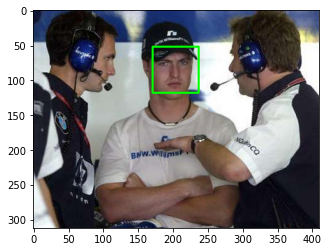

In [4]:
from matplotlib import pyplot as plt
for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner, 
 # w, h are the width and height of the bounding box
 cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
plt.imshow(image[:,:,::-1]) # RGB-> BGR

### Face detection from video

In [9]:
import cv2 as cv
import os
#initialise webcamq1
cam = cv.VideoCapture(0)
#initialise cascade_detector
cascade_detector = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    #read the image from the cam
    _, image = cam.read()
 
    #detect human faces from the current image using the cascade_detector
    faces = detect_face(image, cascade_detector)
 
    #display detected faces
    for x, y, w, h in faces:
        cv.rectangle(image, (x, y), (x + w, y + h), color = (0, 255, 0))
    cv.imshow('face detection demo', image)
 
    if cv.waitKey(1) == ord("q"):
        cv.destroyAllWindows()
        break
 
cam.release()

### Pedestrain Detection

In [5]:
import cv2 as cv
import numpy as np
import imutils
from imutils.object_detection import non_max_suppression
def nms(boxes):
 #We first convert boxes from list to array as required by non_max_suppression method
 #In addition, each box in the array is encoded by the topleft and bottomright corners
    boxes_array = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])
    boxes_array = non_max_suppression(boxes_array, probs = None, overlapThresh = 0.65)
 
 #create a new list of boxes to store results
    boxes_list = []
    for top_x, top_y, bottom_x, bottom_y in boxes_array:
        boxes_list.append([top_x, top_y, bottom_x - top_x, bottom_y - top_y])
    return boxes_list

def detect_pedestrian(image):
 #initialise the HOG descriptor and SVM classifier
    hog = cv.HOGDescriptor()
    hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())
 
    image_resized = imutils.resize(image, width = min(400, image.shape[1])) #resize the input image so that 
     #the width is max by 400
    scale = image.shape[1] / image_resized.shape[1]
 
     #detect pedestrians
    (boxes, _) = hog.detectMultiScale(image_resized,
                                       winStride = (4, 4), #horizontal and vertical stride
                                       padding = (6, 6), #horizontal and vertical padding for each window
                                       scale = 1.2) #scale factor between two consecutive scales
     #non-maximum suppression
    boxes = nms(boxes)
 
    #resize the bounding boxes
    for box in boxes:
        box[0] = np.int(box[0] * scale)
        box[1] = np.int(box[1] * scale)
        box[2] = np.int(box[2] * scale)
        box[3] = np.int(box[3] * scale)
    return boxes

In [6]:
image = cv.imread('PedestrianImages/person_029.png')
start_time = time.time()
pedestrians = detect_pedestrian(image)
print('Pedestrian detection is performed in %s seconds ---' % (time.time() - start_time))

Pedestrian detection is performed in 0.05699634552001953 seconds ---


C:\Users\shane\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Users\shane\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.


Found  1  pedestrians


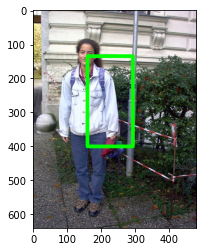

In [7]:
from matplotlib import pyplot as plt
if (pedestrians is not None):
    print('Found ', len(pedestrians), ' pedestrians')
    
    for (x, y, w, h) in pedestrians:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)
    plt.imshow(image[:,:,::-1]) # RGB-> BGR
else:
     print('There is no pedestrian found!')